## Importar paquetes

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio
from mlxtend.plotting import plot_confusion_matrix
from tabulate import tabulate
from scipy import signal
import mat73

## Cargar los archivos necesarios

En la siguiente serie cargamos los archivos:
* data_serie : contiene los datos del acelerómetro del animal correspondiente a la tanda 2. Se usan para graficar la sección de la serie que corresponde a un baño de arena.
* data : tiene cuatro columnas, la primera tiene un número de indice, la segunda contiene POW, la tercera es una columna que nos dice a que eje corresponde el POW calculado, definiendo de manera análoga a lo hecho con POW que utiliza el eje Y pero con los ejes X y Z y en la última columna se tiene información sobre que tipo de evento es, si es un baño de arena o no.
* mat : contiene la misma información de data con otro formato.
* cm : contiene información de la accuracy alcanzada en cada tanda.
* data_scat : contiene información de la duración predicha de los baños de arena y de la duración real de los mismos.
* df2 : contiene información sobre cuando fue realizado un baño de arena y por el individuo de que tanda fue realizado.
* mact : contiene la información de la tanda 14 para realizar el actograma.

In [13]:
data_serie = pd.read_csv("T02_sincomportamiento.csv") 
data = pd.read_csv("df7.csv") 
mat = sio.loadmat('histos_3.mat')
cm = pd.read_csv("df_cm.csv", index_col=0) 
data_scat = pd.read_csv("df_scat.csv") 
df2 = pd.read_csv("df2.csv", index_col=0) 

In [35]:
mact =  mat73.loadmat('para_actograma.mat')

## Sección de la serie de aceleración correspondiente a un baño de arena

In [4]:
def graficar_serie(inicio, final, serie):
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
    ax1.set_xlim(inicio, final)
    ax1.plot(serie)
    plt.show()

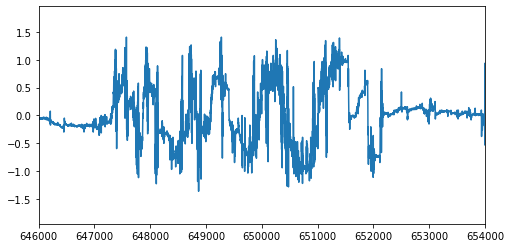

In [5]:
graficar_serie(646000, 654000, data_serie['Axis-Y'])

## Función para graficar una wavelet Morlet

In [6]:
def graficar_wavelet(M,s,w):
    ''' M es el largo de la wavelet
        s es el factor de escala
        w es un factor correspondiente a omega_0'''
    wavelet = signal.morlet(M, s, w)
    plt.plot(wavelet.real, label="real", color='#f88faf', linewidth=4)
    plt.plot(wavelet.imag, label="imag", color='#0de1a0',linewidth=4)
    plt.xlim(-50, 150)
    plt.legend()
    plt.axis('off')
    plt.show()

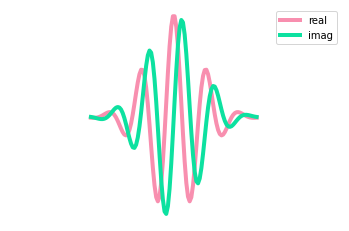

In [7]:
graficar_wavelet(100,5,0.5)

## Gráfico de violines

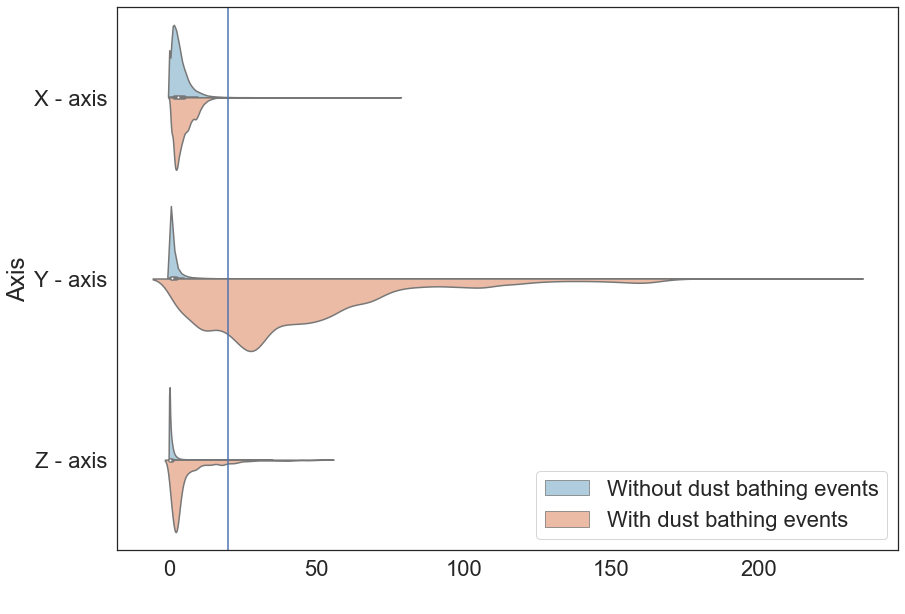

In [9]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="white",  font_scale=2)
# para elegir fondo blanco y el tamaño de la letra
sns.violinplot(data=data, orient="h",x=" ", y="Axis", hue="Events",
               split=True,  dodge=False,scale="width",  palette='RdBu_r', gridsize=200)
# scale width es para que cada violin tenga el mismo ancho
plt.legend(loc='lower right')
# ubicación de la leyenda
#sns.despine(left=True)
# para sacarle los bordes, sólo queda la parte de abajo
plt.axvline(x=20) 
# agrega la linea de referencia vertical
plt.show()

## Histogramas

In [14]:
def histograma_vertical():
    MMX_con = mat['MMX_con']
    MMY_con = mat['MMY_con']
    MMZ_con = mat['MMZ_con']
    MMX_sin = mat['MMX_sin']
    MMY_sin = mat['MMY_sin']
    MMZ_sin = mat['MMZ_sin']
    bbx = []
    for i in range(40):
        bbx.append(2*i)
    
    bby = []
    for i in range(120):
        bby.append(2*i)
    
    bbz = []
    for i in range(30):
        bbz.append(2*i)
    
    fig, axs = plt.subplots(1, 3, figsize=(14, 8))

    axs[0].hist(MMX_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbx)
    axs[0].hist(MMX_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbx)
    axs[0].set_title('Axis X')

    axs[1].hist(MMY_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bby)
    axs[1].hist(MMY_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bby)
    axs[1].set_title('Axis Y')

    axs[2].hist(MMZ_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbz)
    axs[2].hist(MMZ_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbz)
    axs[2].set_title('Axis Z')

    fig.tight_layout()

    plt.show()

In [16]:
def histograma_horizontal():
    MMX_con = mat['MMX_con']
    MMY_con = mat['MMY_con']
    MMZ_con = mat['MMZ_con']
    MMX_sin = mat['MMX_sin']
    MMY_sin = mat['MMY_sin']
    MMZ_sin = mat['MMZ_sin']
    bbx = []
    bbx = []
    for i in range(40):
        bbx.append(2*i)
    
    bby = []
    for i in range(40):
        bby.append(2*i)
    
    bbz = []
    for i in range(40):
        bbz.append(2*i)
    
    fig, axs = plt.subplots(3, 1, figsize=(8, 8))

    axs[0].hist(MMX_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbx)
    axs[0].hist(MMX_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbx)

    axs[0].set_title('Axis X')

    axs[1].hist(MMY_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bby)
    axs[1].hist(MMY_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bby)

    axs[1].axvline(x=20) 
    axs[1].set_title('Axis Y')

    axs[2].hist(MMZ_sin[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbz)
    axs[2].hist(MMZ_con[0], alpha=0.5, density=True, histtype='barstacked', rwidth=0.8, bins=bbz)

    axs[2].set_title('Axis Z')

    fig.tight_layout()

    plt.show()

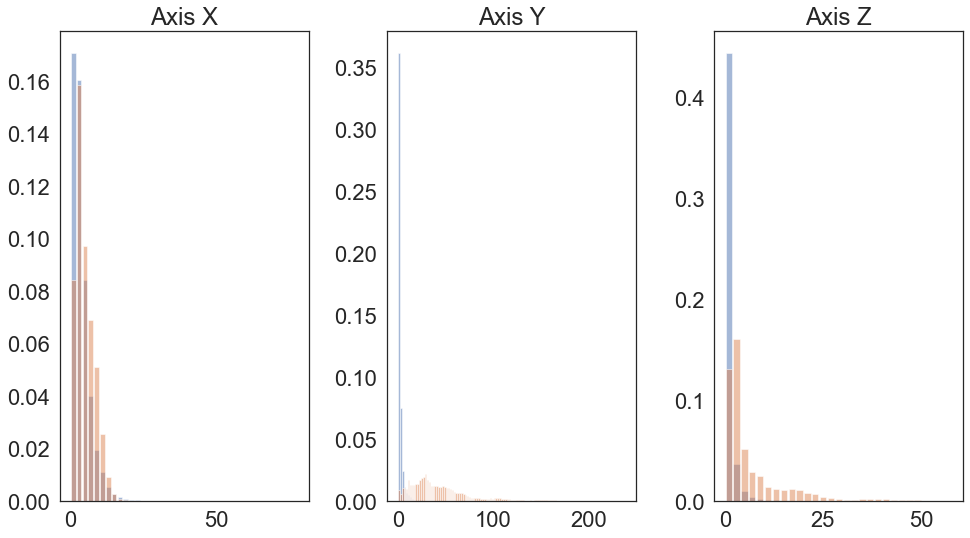

In [15]:
histograma_vertical()

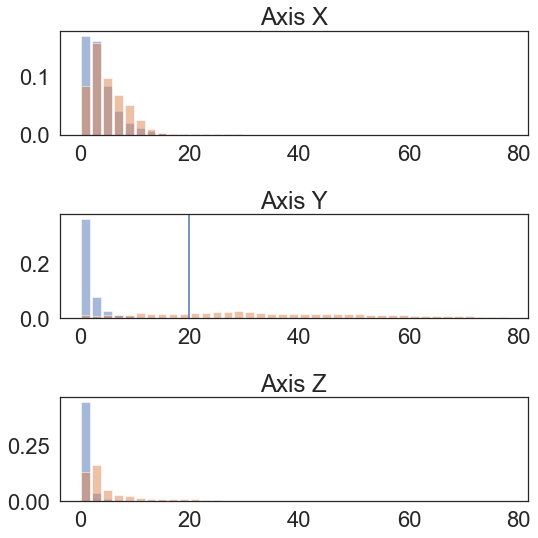

In [17]:
histograma_horizontal()

## Heat map

In [22]:
def plot_heatmap(matriz):
    plt.figure(figsize = (10,6))
    plt.title('Accuracy (%)')
    sns.heatmap(matriz, annot=True, fmt=".1f", cmap=plt.cm.YlGn)
    plt.ylabel('Achieved over N events')
    plt.show()

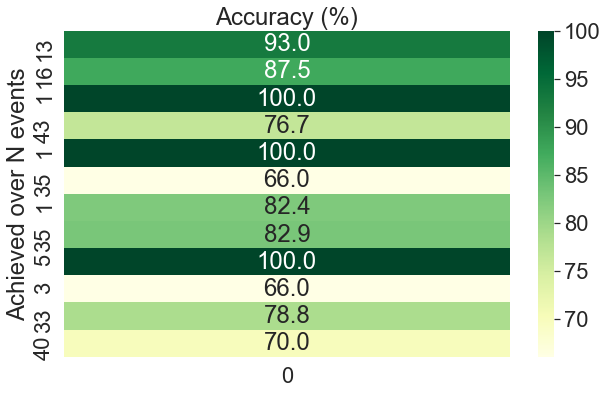

In [23]:
plot_heatmap(cm)

In [24]:
def plot_scater(data):
    p = np.polyfit(data['predicted'], data['observed'], 1)
    x1 = np.linspace(0, 600)
    f1 = np.polyval(p, x1)
    yfit = p[0] * np.array(data['predicted']) + p[1]
    yresid = np.array(data['observed']) - yfit
    SSresid = np.sum(yresid ** 2)
    SStotal = (len(data['observed']) - 1) * np.var(data['observed'])
    coeficiente_de_determinacion = 1 - SSresid / SStotal
    plt.figure(figsize = (10,10))
    sns.set_theme(style="white")
    plt.title('Relationship between the estimation of duration of dustbathing and the duration registered of video recordings')
    color_palette = sns.color_palette("tab20", 13)
    sns.scatterplot(data=data, x='predicted', y='observed', hue = 'box',  palette=color_palette)
    plt.plot(x1, f1, 'k')
    plt.xlabel('observed duration of event from video (s)')
    plt.ylabel('predicted duration of events (s)')
    plt.show()

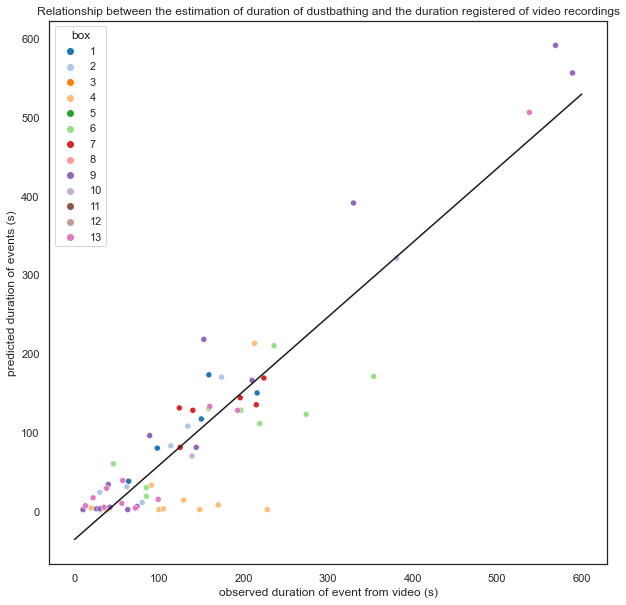

In [25]:
plot_scater(data_scat)

## Histogramas apilados

In [26]:
def his_apilados(data):
    plt.figure(figsize=(14, 10))
    sns.set_theme(style="white")
    color_palette = sns.color_palette("tab20", 13)
    sns.histplot(data=data, x="Hour",hue="Box",multiple="stack", binrange=[9,20], palette=color_palette, binwidth=0.5)
    plt.xticks(range(9, 21))
    plt.show()

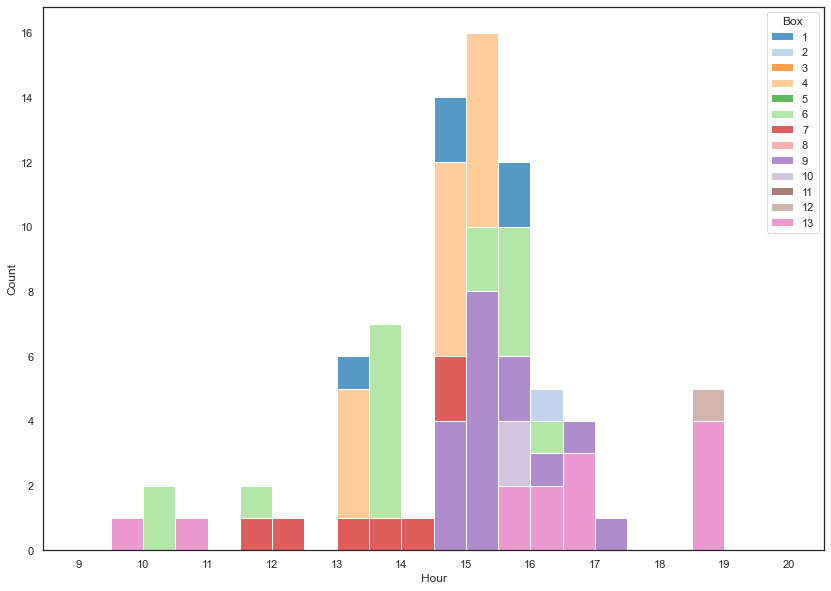

In [27]:
his_apilados(df2)

## Matrices de confusión

In [28]:
def plot_matrices(matriz):
    ''' esta función tiene como entrada una matriz 2x2
        más específicamente un array de numpy y lo que 
        hará es imprimir la matriz de confusión y una 
        tabla con la información de exactitud (accuracy)
        sencibilidad (sencibility) y especificidad 
        (specificity)
    '''
    conf_matrix = matriz
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.YlGn) #YlGn
    # Configurar el tamaño de la letra
    text_kwargs = {'fontsize': 18}

    # Ajustar las propiedades del texto en la matriz
    for _, j in enumerate(ax.texts):
        j.set_fontsize(text_kwargs['fontsize'])
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Observed by video', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    
    if conf_matrix[0,0]+conf_matrix[0,1] == 0:
        sensit = 'cannot be calculated'
    else:
        sensit = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    if conf_matrix[1,0]+conf_matrix[1,1] == 0:
        spec = 'cannot be calculated'
    else:
        spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    if conf_matrix[0,0]+conf_matrix[1,0]+conf_matrix[0,1]+conf_matrix[1,1] == 0:
        acc = 'cannot be calculated'
    else:
        acc = (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,0]+conf_matrix[0,1]+conf_matrix[1,1])
    
    data = [[sensit, spec, acc]]
    headers = ["sensitivity", "specificity", "accuracy" ]
    
    print(tabulate(data, headers=headers, tablefmt="pretty"))

Tanda  1


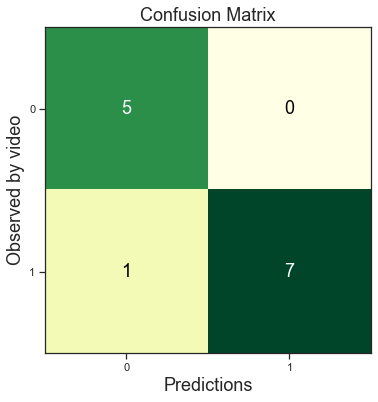

+-------------+-------------+--------------------+
| sensitivity | specificity |      accuracy      |
+-------------+-------------+--------------------+
|     1.0     |    0.875    | 0.9230769230769231 |
+-------------+-------------+--------------------+
---------------------
Tanda  2


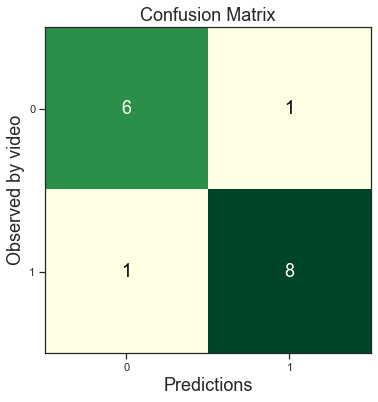

+--------------------+--------------------+----------+
|    sensitivity     |    specificity     | accuracy |
+--------------------+--------------------+----------+
| 0.8571428571428571 | 0.8888888888888888 |  0.875   |
+--------------------+--------------------+----------+
---------------------
Tanda  3


C:\Users\pc\anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


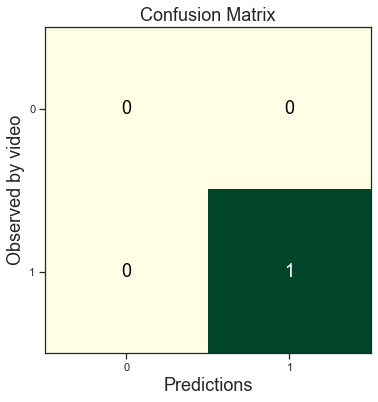

+----------------------+-------------+----------+
|     sensitivity      | specificity | accuracy |
+----------------------+-------------+----------+
| cannot be calculated |     1.0     |   1.0    |
+----------------------+-------------+----------+
---------------------
Tanda  4


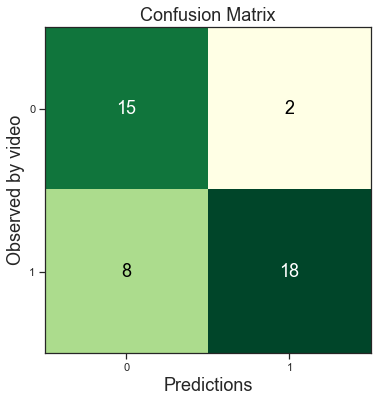

+--------------------+--------------------+--------------------+
|    sensitivity     |    specificity     |      accuracy      |
+--------------------+--------------------+--------------------+
| 0.8823529411764706 | 0.6923076923076923 | 0.7674418604651163 |
+--------------------+--------------------+--------------------+
---------------------
Tanda  5


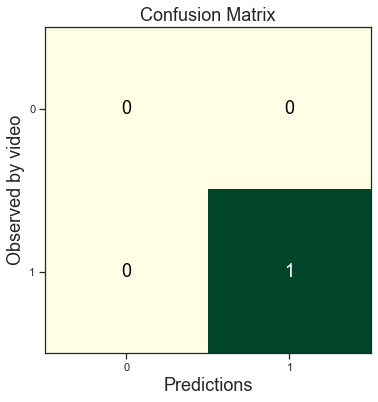

+----------------------+-------------+----------+
|     sensitivity      | specificity | accuracy |
+----------------------+-------------+----------+
| cannot be calculated |     1.0     |   1.0    |
+----------------------+-------------+----------+
---------------------
Tanda  6


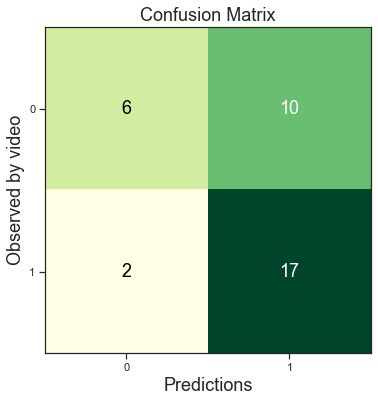

+-------------+--------------------+--------------------+
| sensitivity |    specificity     |      accuracy      |
+-------------+--------------------+--------------------+
|    0.375    | 0.8947368421052632 | 0.6571428571428571 |
+-------------+--------------------+--------------------+
---------------------
Tanda  7


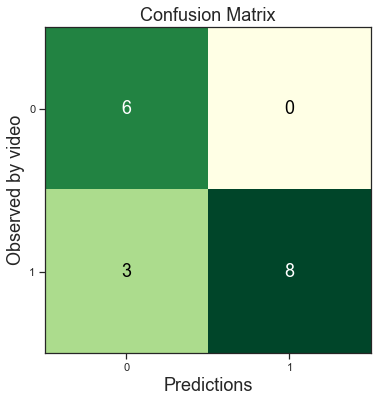

+-------------+--------------------+--------------------+
| sensitivity |    specificity     |      accuracy      |
+-------------+--------------------+--------------------+
|     1.0     | 0.7272727272727273 | 0.8235294117647058 |
+-------------+--------------------+--------------------+
---------------------
Tanda  8


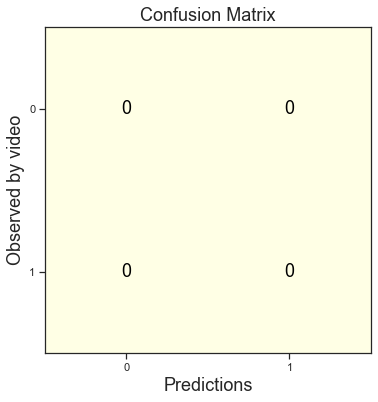

+----------------------+----------------------+----------------------+
|     sensitivity      |     specificity      |       accuracy       |
+----------------------+----------------------+----------------------+
| cannot be calculated | cannot be calculated | cannot be calculated |
+----------------------+----------------------+----------------------+
---------------------
Tanda  9


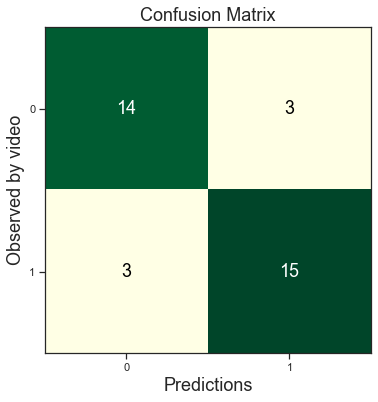

+--------------------+--------------------+--------------------+
|    sensitivity     |    specificity     |      accuracy      |
+--------------------+--------------------+--------------------+
| 0.8235294117647058 | 0.8333333333333334 | 0.8285714285714286 |
+--------------------+--------------------+--------------------+
---------------------
Tanda  10


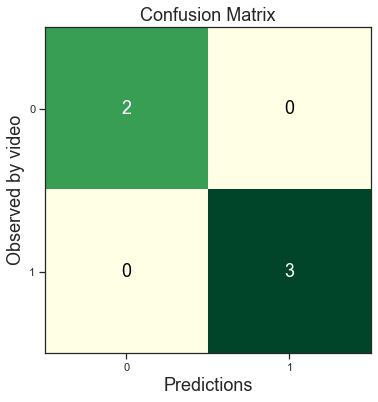

+-------------+-------------+----------+
| sensitivity | specificity | accuracy |
+-------------+-------------+----------+
|     1.0     |     1.0     |   1.0    |
+-------------+-------------+----------+
---------------------
Tanda  11


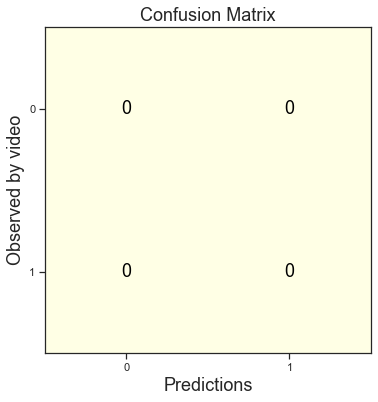

+----------------------+----------------------+----------------------+
|     sensitivity      |     specificity      |       accuracy       |
+----------------------+----------------------+----------------------+
| cannot be calculated | cannot be calculated | cannot be calculated |
+----------------------+----------------------+----------------------+
---------------------
Tanda  12


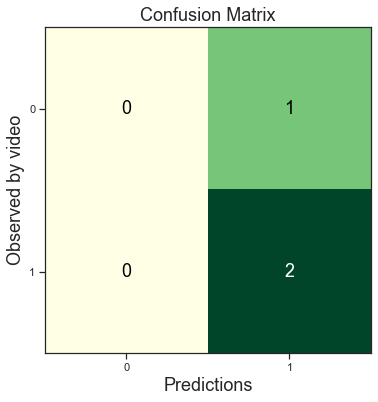

+-------------+-------------+--------------------+
| sensitivity | specificity |      accuracy      |
+-------------+-------------+--------------------+
|     0.0     |     1.0     | 0.6666666666666666 |
+-------------+-------------+--------------------+
---------------------
Tanda  13


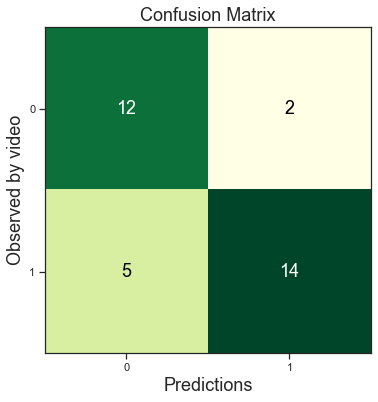

+--------------------+--------------------+--------------------+
|    sensitivity     |    specificity     |      accuracy      |
+--------------------+--------------------+--------------------+
| 0.8571428571428571 | 0.7368421052631579 | 0.7878787878787878 |
+--------------------+--------------------+--------------------+
---------------------


In [29]:
M1 = np.array([[5, 0],[1, 7]])
M2 = np.array([[6, 1],[1, 8]])
M3 = np.array([[0,0],[0,1]])
M4 = np.array([[15, 2],[8, 18]])
M5 = np.array([[0,0],[0,1]])
M6 = np.array([[6, 10],[2, 17]])
M7 = np.array([[6, 0],[3, 8]])
M8 = np.array([[0,0],[0,0]])
M9 = np.array([[14,3],[3, 15]])
M10 = np.array([[2,0],[0,3]])
M11 = np.array([[0,0],[0,0]])
M12 = np.array([[0,1],[0,2]])
M13 = np.array([[12,2],[5,14]])

matrices = [M1, M2,M3, M4, M5, M6, M7, M8, M9, M10, M11, M12, M13]
for i in range(len(matrices)):
    print('Tanda ', i+1)
    plot_matrices(matrices[i])
    print('---------------------')

Tanda 14; solo una parte de la serie fue analizada


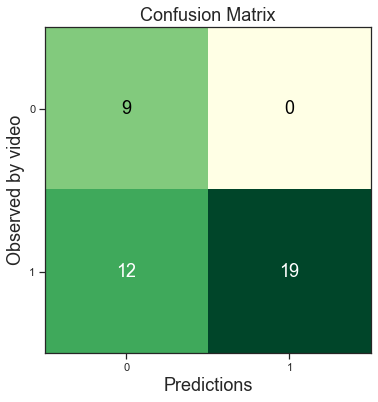

+-------------+--------------------+----------+
| sensitivity |    specificity     | accuracy |
+-------------+--------------------+----------+
|     1.0     | 0.6129032258064516 |   0.7    |
+-------------+--------------------+----------+


In [30]:
T14 = np.array([[9,0],[12,19]])
print('Tanda 14; solo una parte de la serie fue analizada')
plot_matrices(T14)

Todas las tandas juntas


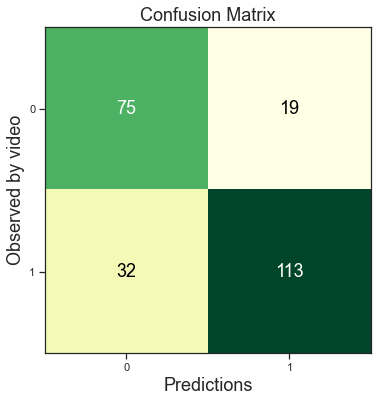

+--------------------+--------------------+--------------------+
|    sensitivity     |    specificity     |      accuracy      |
+--------------------+--------------------+--------------------+
| 0.7978723404255319 | 0.7793103448275862 | 0.7866108786610879 |
+--------------------+--------------------+--------------------+


In [31]:
Mall = np.array([[75,19],[32,113]])
print('Todas las tandas juntas')
plot_matrices(Mall)

Todas las tandas juntas por puntos


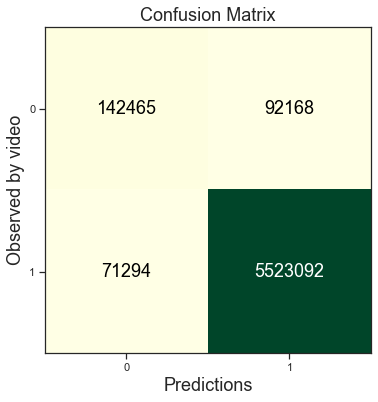

+--------------------+--------------------+--------------------+
|    sensitivity     |    specificity     |      accuracy      |
+--------------------+--------------------+--------------------+
| 0.6071822804123888 | 0.9872561528646754 | 0.9719572024040409 |
+--------------------+--------------------+--------------------+


In [32]:
Mpuntos = np.array([[142465,92168],[71294, 5523092]])
print('Todas las tandas juntas por puntos')
plot_matrices(Mpuntos)

## Actograma

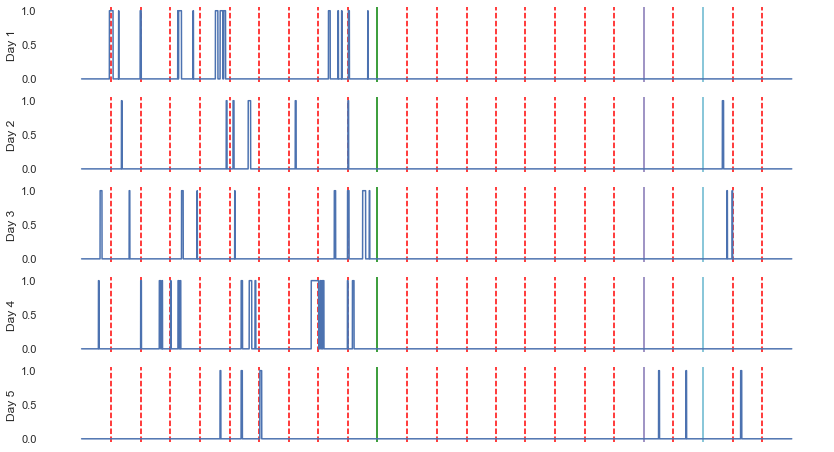

In [37]:
vector = mact['vector_final']
dia_1 = [0]*15000
for i in range(2145000):
    dia_1.append(vector[i])
dia_2 = vector[2145000:4305000]
dia_3 = vector[4305000:6465000]
dia_4 = vector[6465000:8625000]
dia_5 = vector[8625000:10785000]
fig, axs = plt.subplots(5, 1, figsize=(14, 8))

for ax in axs:
    ax.spines['top'].set_visible(False)    # Hide the top border
    ax.spines['bottom'].set_visible(False) # Hide the bottom border
    ax.spines['left'].set_visible(False)   # Hide the left border
    ax.spines['right'].set_visible(False)  # Hide the right border
    ax.axvline(x=90000, color='red', linestyle='--')
    ax.axvline(x=180000, color='red', linestyle='--')
    ax.axvline(x=270000, color='red', linestyle='--')
    ax.axvline(x=360000, color='red', linestyle='--')
    ax.axvline(x=450000, color='red', linestyle='--')
    ax.axvline(x=540000, color='red', linestyle='--')
    ax.axvline(x=630000, color='red', linestyle='--')
    ax.axvline(x=720000, color='red', linestyle='--')
    ax.axvline(x=810000, color='red', linestyle='--')
    ax.axvline(x=900000, color='green') # 18 hs
    ax.axvline(x=990000, color='red', linestyle='--')
    ax.axvline(x=1080000, color='red', linestyle='--')
    ax.axvline(x=1172000, color='red', linestyle='--')
    ax.axvline(x=1260000, color='red', linestyle='--')
    ax.axvline(x=1350000, color='red', linestyle='--')
    ax.axvline(x=1440000, color='red', linestyle='--')
    ax.axvline(x=1530000, color='red', linestyle='--')
    ax.axvline(x=1620000, color='red', linestyle='--')
    ax.axvline(x=1710000, color='m')    # 3 am 
    ax.axvline(x=1800000, color='red', linestyle='--')
    ax.axvline(x=1890000, color='c') # 5 am
    ax.axvline(x=1980000, color='red', linestyle='--')
    ax.axvline(x=2070000, color='red', linestyle='--')
    
axs[0].plot(dia_1)
#axs[0].axis('off')  # Turn off the axes for the subplot
axs[0].get_xaxis().set_visible(False)
axs[0].set_ylabel("Day 1")

axs[1].plot(dia_2)
axs[1].get_xaxis().set_visible(False)
#axs[1].axis('off')  # Turn off the axes for the subplot
axs[1].set_ylabel("Day 2")

axs[2].plot(dia_3)
axs[2].get_xaxis().set_visible(False)
#axs[2].axis('off')  # Turn off the axes for the subplot
axs[2].set_ylabel("Day 3")

axs[3].plot(dia_4)
axs[3].get_xaxis().set_visible(False)
axs[3].set_ylabel("Day 4")

axs[4].plot(dia_5)
axs[4].get_xaxis().set_visible(False)
axs[4].set_ylabel("Day 5")

plt.show()